# GIOVALDI EXAM 3

# IMPORT DATA

In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, roc_auc_score, precision_score, f1_score,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import pickle



pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 300)
%matplotlib inline

# Defining Problem (Tentukan Masalah yang Ingin Anda Pecahkan) (5 point)

- Mengidentifikasi pengaruh usia dan gender terhadap potensi untuk terkena penyakit jantung
- Mengidentifikasi apa faktor-faktor penyakit jantung 
- Mengidentifikasi pasien yang mengidap penyakit jantung dan tidak dengan metode klasifikasi

# Defining Project Goals (Tentukan Tujuan dari Project Anda) (5 point)

- mendapatkan usia dan gender yang paling berpotensi terdampak penyakit jantung
- mendapatkan faktor-faktor lain yang mempengaruhi penyakit jantung
- mendapatkan model untuk mengklasifikasikan pasien yang mengidap penyakit jantung dan tidak

# Describe Data - Termasuk Handling Missing Value (5 point)

In [6]:
heart = pd.read_csv('./Desktop/heart.csv')

In [7]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
heart.shape

(303, 14)

In [9]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [12]:
heart_describe =[]

for i in heart.columns:
    heart_describe.append([
        i,
        heart[i].dtypes,
        heart[i].isna().sum(),
        round((((heart[i].isna().sum())/(len(heart)))*100),2),
        heart[i].nunique(),
        heart[i].unique()
    ])

In [13]:
DESC = pd.DataFrame(heart_describe, columns=['column','type','nan','nan%','nunique','unique'])
DESC

,column,type,nan,nan%,nunique,unique
0,age,int64,0,0.0,41,"[63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 5..."
1,sex,int64,0,0.0,2,"[1, 0]"
2,cp,int64,0,0.0,4,"[3, 2, 1, 0]"
3,trestbps,int64,0,0.0,49,"[145, 130, 120, 140, 172, 150, 110, 135, 160, ..."
4,chol,int64,0,0.0,152,"[233, 250, 204, 236, 354, 192, 294, 263, 199, ..."
5,fbs,int64,0,0.0,2,"[1, 0]"
6,restecg,int64,0,0.0,3,"[0, 1, 2]"
7,thalach,int64,0,0.0,91,"[150, 187, 172, 178, 163, 148, 153, 173, 162, ..."
8,exang,int64,0,0.0,2,"[0, 1]"
9,oldpeak,float64,0,0.0,40,"[2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, ..."


## Berdasarkan data diatas, dapat dilihat terdapat 12 kolom yang memiliki 11 type data integer dan 1 kolom type data float. Untuk persentase serta jumlah NaN tidak terlihat adanya. Untuk selanjutnya akan dilakukan pengecekan terhadap duplicated value dan handling outliers

In [16]:
heart.duplicated().sum()

1

In [17]:
heart = heart.drop_duplicates()

# Handling Outiers / Imbalance data (5 point)

sumber referensi :
https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

In [20]:
heart.skew(axis = 0, skipna = True)

age        -0.203743
sex        -0.786120
cp          0.493022
trestbps    0.716541
chol        1.147332
fbs         1.981201
restecg     0.169467
thalach    -0.532671
exang       0.737281
oldpeak     1.266173
slope      -0.503247
ca          1.295738
thal       -0.481232
target     -0.173691
dtype: float64

In [21]:
heart['target'].skew()

-0.17369101189529737

## Melakukan metode Skewness dilakukan untuk pengcekan distribusi data. Kemencengan atau kecondongan (skewness) adalah tingkat ketidaksimetrisan atau kejauhan simetri dari sebuah distribusi. Sebuah distribusi yang normal adalah jika Skewness data yang diperoleh berada rentang -2 sampai 2 .

# Data Analysis (Gunakan salah satu atau beberapa pandas methods crosstab, pivot table, group by ) (10 point)
#

- https://python-graph-gallery.com buat seaborn,matplotlib
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html buat pandas
- https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html buat pandas pivot table

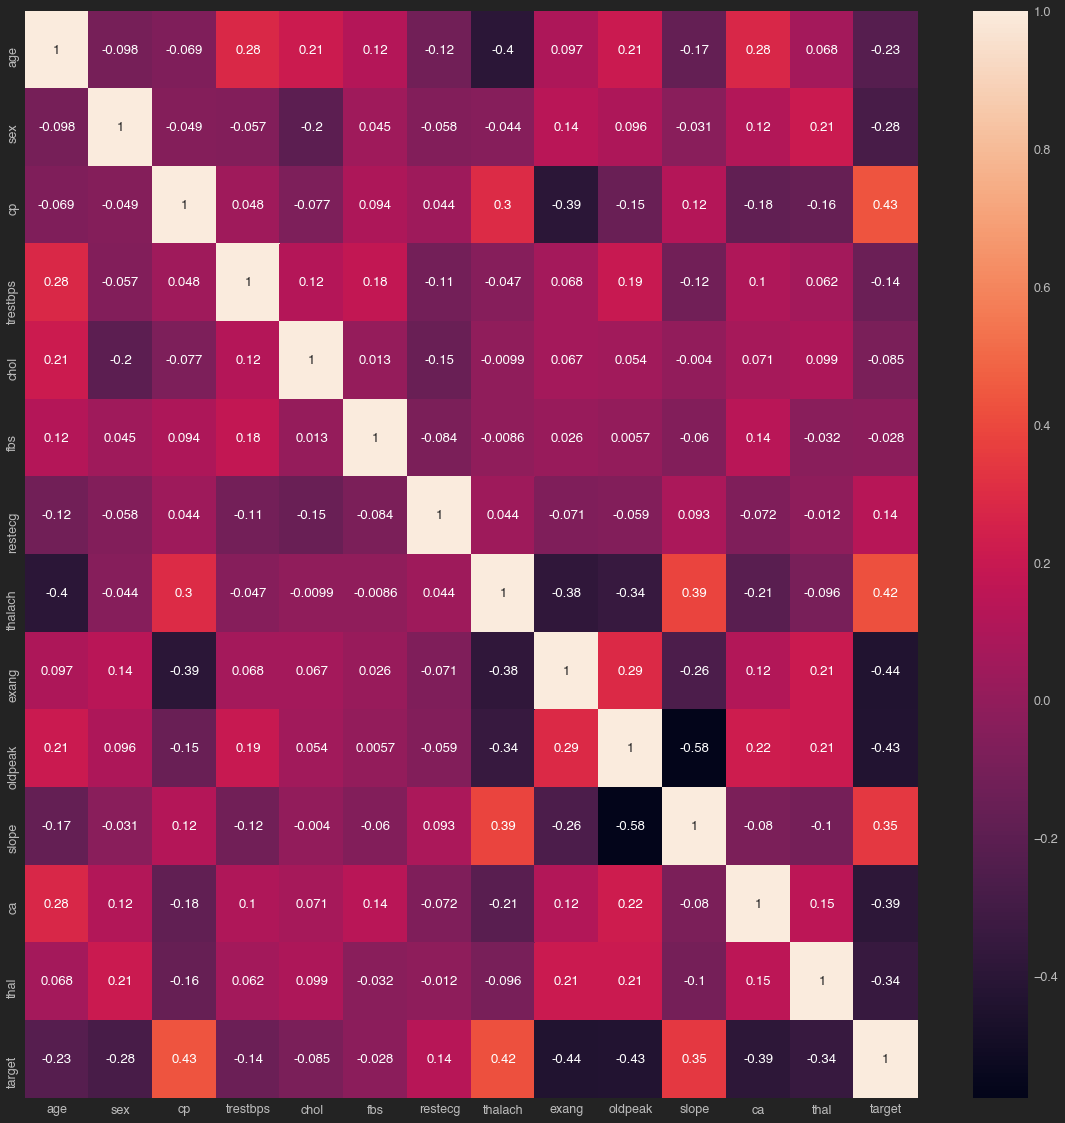

In [41]:
plt.figure(figsize=(20, 20))
sns.heatmap(airbnbl.corr('pearson'),annot=True)

## Berdasarkan grafik diatas, dilakukan uji korelasi heatmap metode pearson karena data terdistribusi normal atau tidak inbalance. Selanjutnya akan dilakukan analisa terkait hasil dari korelasi tersebut



# Data Visualization (Plot yang harus ada adalah histogram dan boxplot selain yang memang anda butuhkan) (10 point)

# Insight Data setiap data analysis dan data visualization yang dilakukan (5 point)

- https://python-graph-gallery.com buat seaborn,matplotlib
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html buat pandas
- https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html buat pandas pivot table
- https://www.youtube.com/watch?v=FkFRGo4pBds buat contoh kasus

## TARGET

In [25]:
heart.corr()['target'].sort_values(ascending=False).round(3)

target      1.000
cp          0.432
thalach     0.420
slope       0.344
restecg     0.135
fbs        -0.027
chol       -0.081
trestbps   -0.146
age        -0.221
sex        -0.284
thal       -0.343
ca         -0.409
oldpeak    -0.429
exang      -0.436
Name: target, dtype: float64

In [26]:
heart.target.value_counts()

1    164
0    138
Name: target, dtype: int64

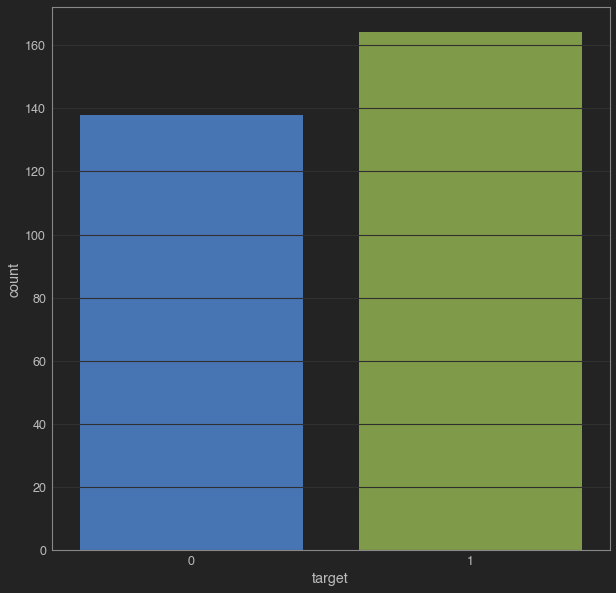

In [42]:
plt.figure(figsize=(10, 10))
sns.countplot(x='target', data=heart)
plt.show()

Berdasarkan data diatas, dapat dilihat bahwa target 1 atau memiliki penyakit jantung teridentifikasi memiliki angka lebih banyak dibandingkan dengan target 2 atau yang tidak memiliki penyakit jantung

In [37]:
heart.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.585366,0.560976,1.371951,129.250000,242.640244,0.140244,0.591463,158.378049,0.140244,0.586585,1.591463,0.341463,2.121951


# mendapatkan usia dan gender yang paling berpotensi terdampak penyakit jantung

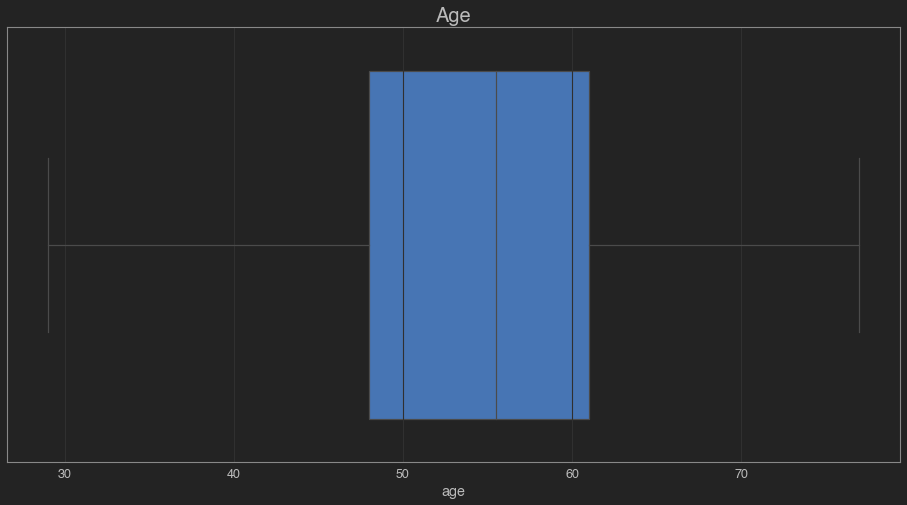

In [69]:
plt.figure(figsize = (16, 8))

sns.boxplot(heart['age'])
plt.title('Age', size=20)
plt.show()

Berdasarkan data diatas, dapat dilihat bahwa rentang usia untuk data heart ini yaitu dari usia 29 sampai 77

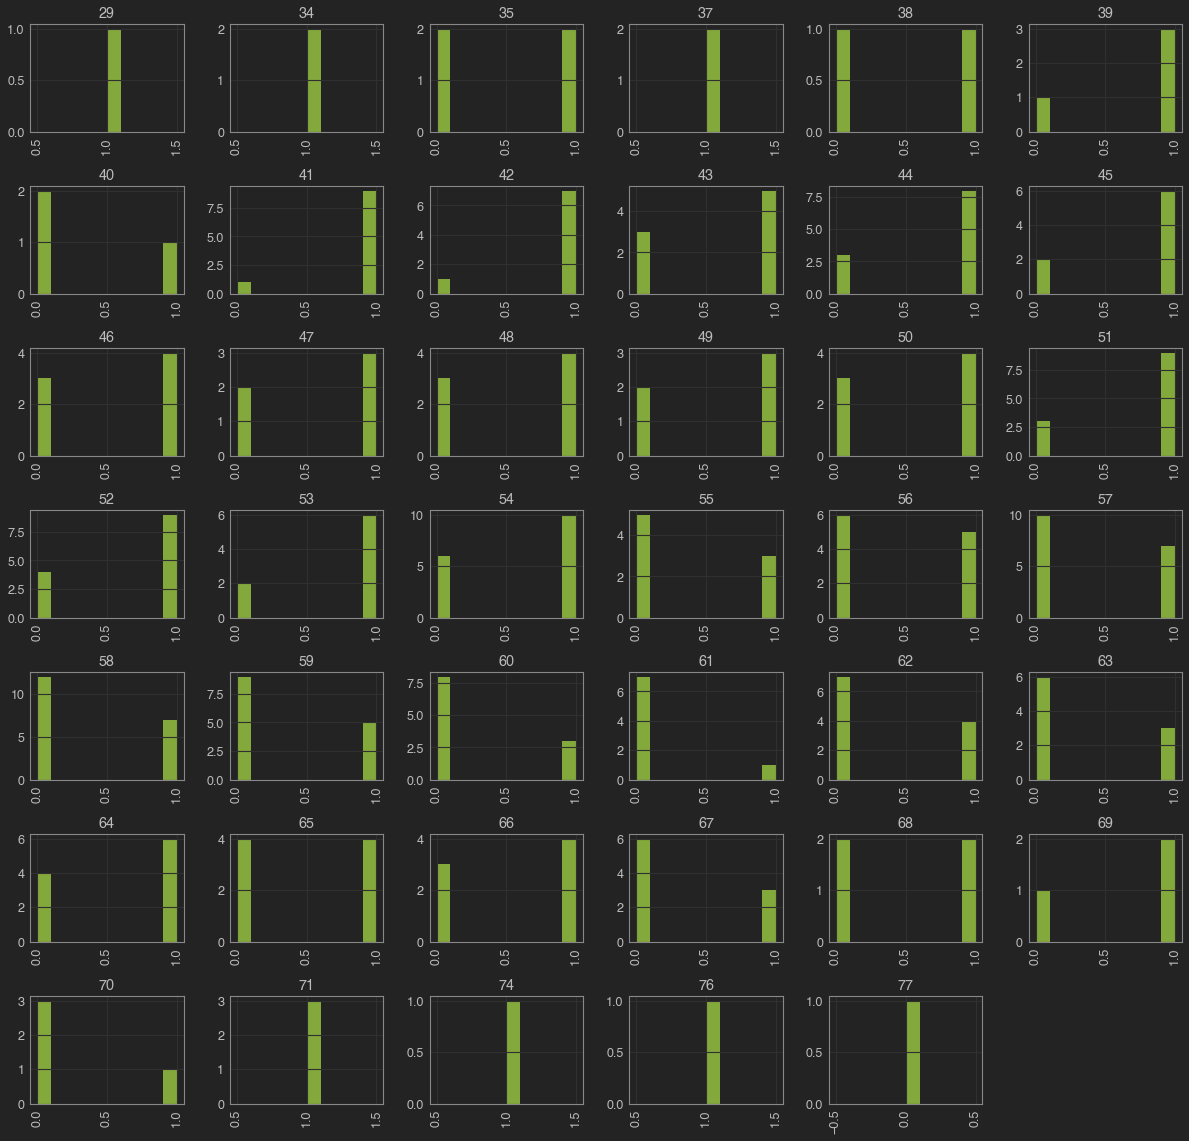

In [64]:
heart.hist('target', by='age',figsize = (20, 20),color='g');

Grafik diatas menunjukan persebaran data penderita penyakit jantung berdasarkan usianya . Bisa dilihat bahwa usia 40-50an cenderung positif menderita penyakit jantung. Lalu, ternyata usia muda pun tidak menutup kemungkinan orang tersebut tidak terkena jantung. Untuk selanjutnya akan dilakukan analisis lebih dalam terkait hal ini.

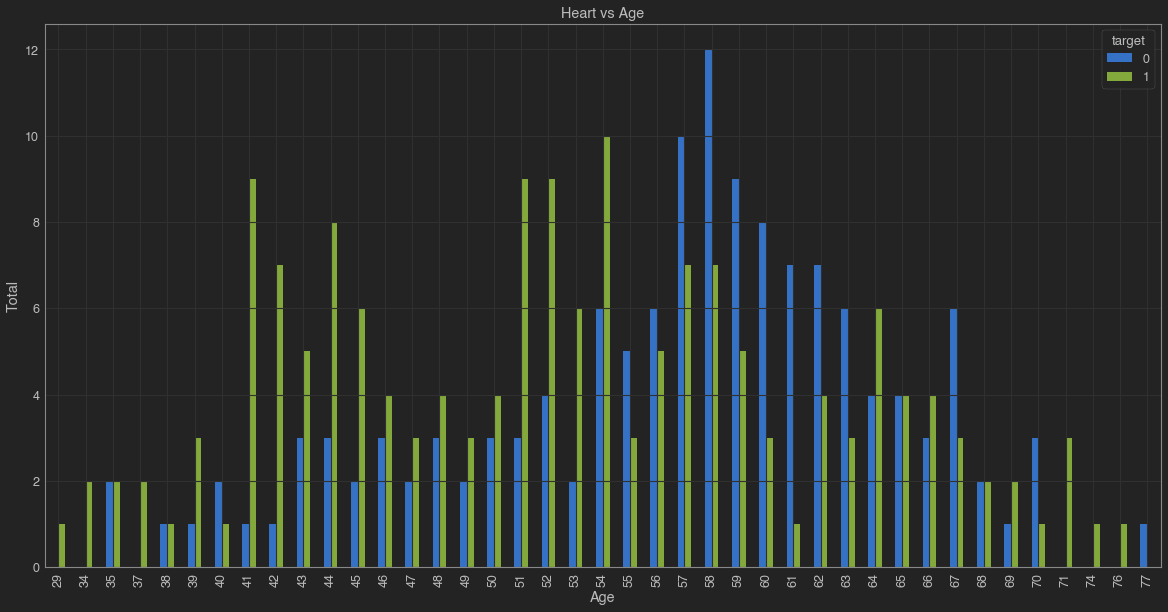

In [51]:
pd.crosstab(heart.age,heart.target).plot(kind="bar",figsize=(20,10))
plt.title('Heart vs Age')
plt.xlabel('Age')
plt.ylabel('Total')
plt.savefig('heartvsage.png')
plt.show()

## Berdasarkan angka diatas ditemukan bahwa, umur pasien yang paling banyak berpotensi terkena penyakit jantung adalah 51, 54,41, dan 44. Sedangkan untuk yang paling teridentifikasi tidak berpotensi adalah di umur 58,57,60, dan 59. Angka target tersebut mulai tidak stagnan setelah menginjak umur 40 tahun hingga 67

In [47]:
heart.pivot_table(index='age', values='target', aggfunc=['min','max','mean','count']).T

,age,29,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,74,76,77
min,target,1.0,1.0,0.0,1.0,0.0,0.00,0.000000,0.0,0.000,0.000,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.00,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00,1.0,1.0,1.0,0.0
max,target,1.0,1.0,1.0,1.0,1.0,1.00,1.000000,1.0,1.000,1.000,1.000000,1.00,1.000000,1.0,1.000000,1.0,1.000000,1.00,1.000000,1.00,1.000,1.000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.00,1.0,1.0,1.0,0.0
mean,target,1.0,1.0,0.5,1.0,0.5,0.75,0.333333,0.9,0.875,0.625,0.727273,0.75,0.571429,0.6,0.571429,0.6,0.571429,0.75,0.692308,0.75,0.625,0.375,0.454545,0.411765,0.368421,0.357143,0.272727,0.125,0.363636,0.333333,0.6,0.5,0.571429,0.333333,0.5,0.666667,0.25,1.0,1.0,1.0,0.0
count,target,1.0,2.0,4.0,2.0,2.0,4.00,3.000000,10.0,8.000,8.000,11.000000,8.00,7.000000,5.0,7.000000,5.0,7.000000,12.00,13.000000,8.00,16.000,8.000,11.000000,17.000000,19.000000,14.000000,11.000000,8.000,11.000000,9.000000,10.0,8.0,7.000000,9.000000,4.0,3.000000,4.00,3.0,1.0,1.0,1.0


In [174]:
sex= heart.groupby(['sex','age'])['target'].count().reset_index().sort_values(by='target',ascending=False)
sex.head(10).T

,59,58,60,53,55,45,52,57,61,65
sex,1,1,1,1,1,1,1,1,1,1
age,58,57,59,52,54,44,51,56,60,64
target,13,13,13,12,11,9,8,8,7,7


## Dari data diatas, apabila kita bandingkan dengan total datanya ternyata umur 54,51,41,44 memiliki total pengidap mencapai 16+12+10+11= 49 pasien. Untuk selanjutnya, akan telaah menurut gender/sex dari pasien. Lalu jumlah serangan jantung yang telah terjadi untuk usia tertentu dalam kasus pria dan wanita terlihat di kolom diatas. Berdasarkan urutan 10 serangan jantung, pria ebih banyak mengidap serangan jantung.

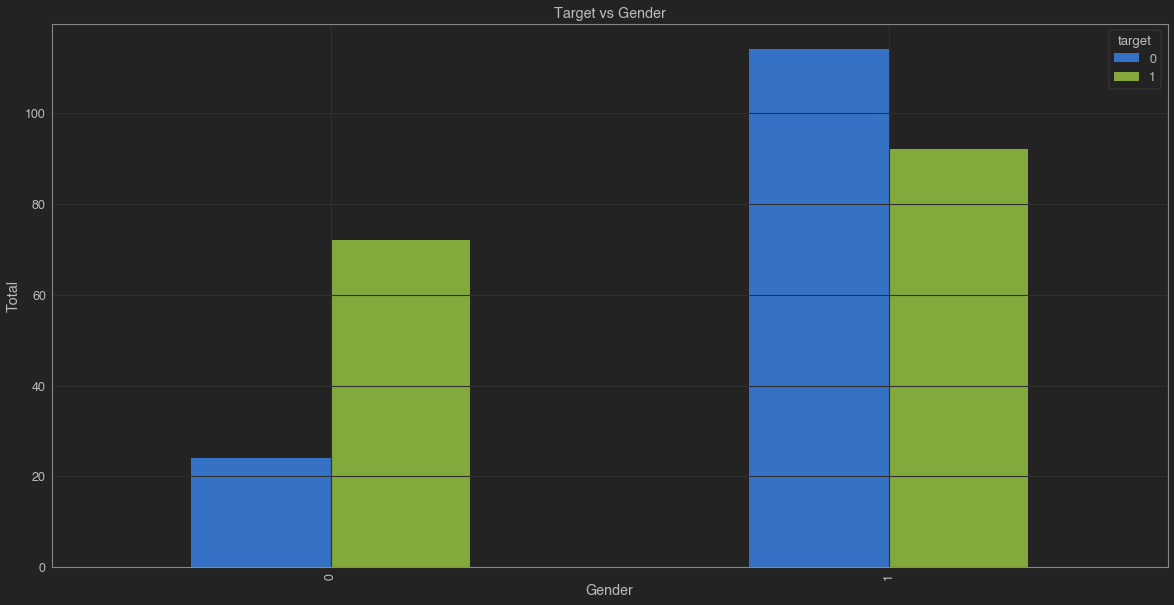

In [56]:
pd.crosstab(heart.sex,heart.target).plot(kind="bar",figsize=(20,10))
plt.title('Target vs Gender')
plt.xlabel('Gender')
plt.ylabel('Total')
plt.savefig('heartvsgender.png')
plt.show()

In [50]:
heart.pivot_table(index='sex', values='target', aggfunc=['min','max','mean','count']).T

,sex,0,1
min,target,0.00,0.000000
max,target,1.00,1.000000
mean,target,0.75,0.446602
count,target,96.00,206.000000


## Berdasarkan data diatas, dapat kita simpulkan bahwa laki-laki memiliki kecenderungan untuk mengidap jantung lebih besar dibandingkan wanita dengan total 206 jiwa sedangkan wanita 96 jiwa.

In [54]:
wanita = len(heart[heart.sex == 0])
pria = len(heart[heart.sex == 1])
print("Persentase pasien wanita: {}%".format((wanita / (len(heart.sex))*100)))
print("Persentase pasien pria: {}%".format((pria / (len(heart.sex))*100)))

Persentase pasien wanita: 31.788079470198678%
Persentase pasien pria: 68.21192052980133%


# mendapatkan faktor-faktor penentu yang mengidentifikasi penyakit jantung

CP

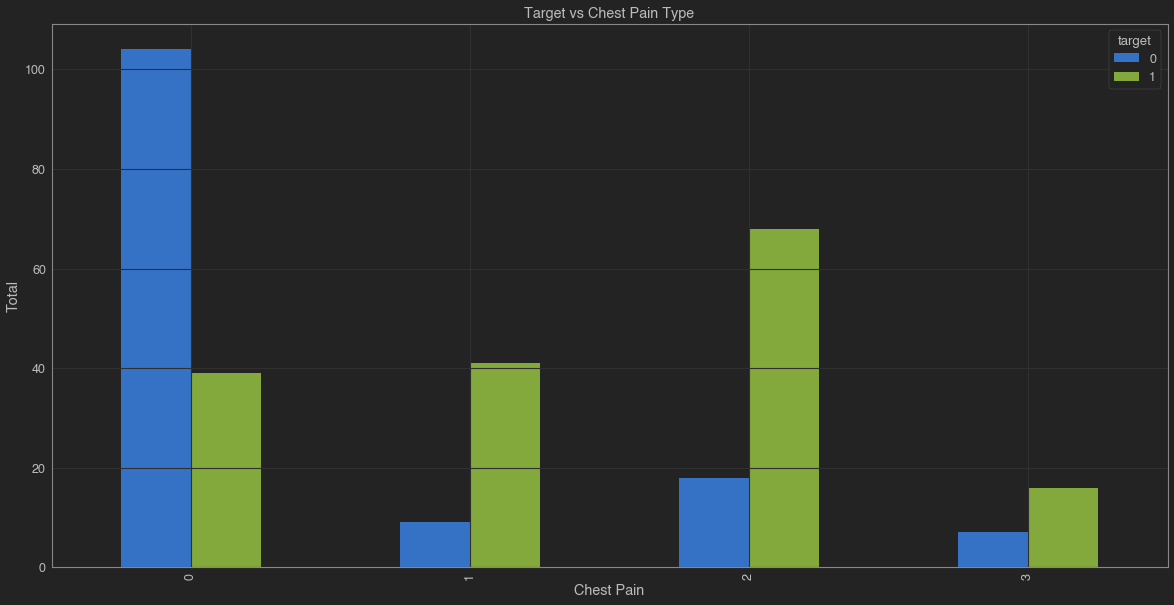

In [97]:
pd.crosstab(heart.cp,heart.target).plot(kind="bar",figsize=(20,10))
plt.title('Target vs Chest Pain Type')
plt.xlabel('Chest Pain')
plt.ylabel('Total')
plt.savefig('heartvschest.png')
plt.show()

In [116]:
heart.pivot_table(index='cp', values='target', aggfunc=['min','max','mean','count'])

,min,max,mean,count
,target,target,target,target
cp,,,,
0,0,1,0.272727,143
1,0,1,0.820000,50
2,0,1,0.790698,86
3,0,1,0.695652,23


In [177]:
cp= heart.groupby(['sex','cp'])['target'].count().reset_index().sort_values(by='target',ascending=False)
cp.head(10).T

,4,6,0,2,5,7,1,3
sex,1,1,0,0,1,1,0,0
cp,0,2,0,2,1,3,1,3
target,104,51,39,35,32,19,18,4


## Berdasakan data diatas dapat dilihat bahwa, Type Chest Pain 2 atau nonanginal memiliki kecenderungan untuk mengidap jantung. Lalu untuk tipe 0 atau typical memiliki angka tidak terdeteksi jantung tinggi. Pria yang memiliki nyeri dada tipe 0 menderita serangan jantung paling tinggi dan tipe 2 tertinggi kedua. Kecenderungan ini sama untuk wanita.

TRESBPS

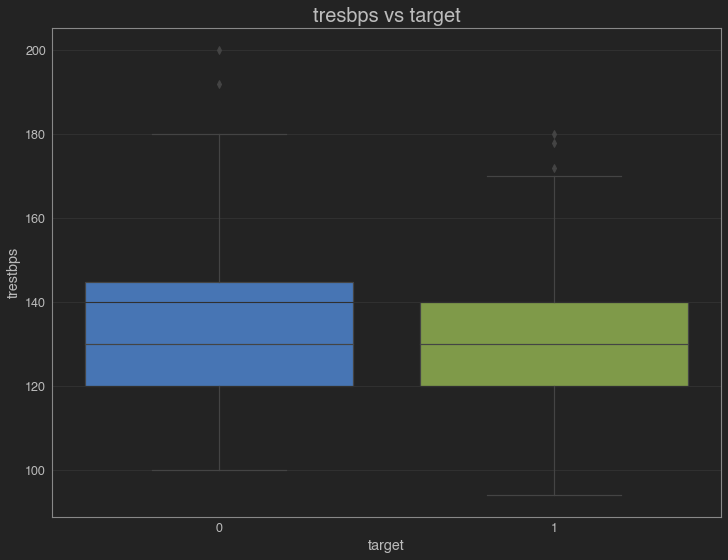

In [87]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(heart['target'], heart['trestbps'])
plt.title('tresbps vs target', fontsize = 20)
plt.show()

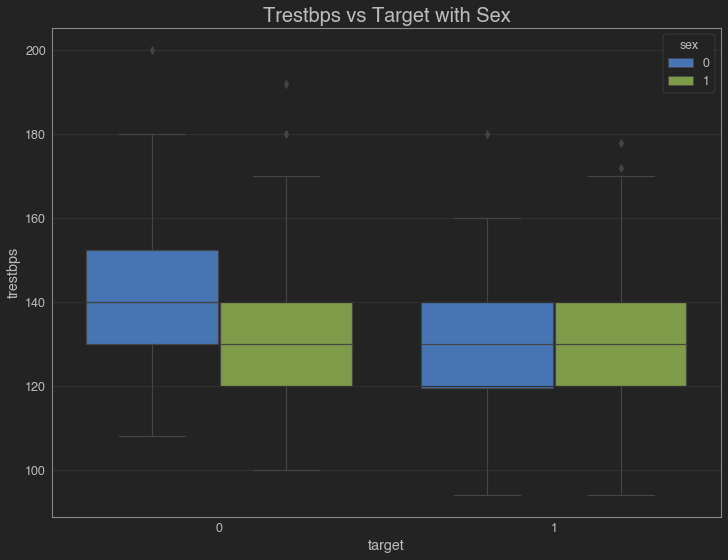

In [85]:
sns.boxplot(x = heart['target'], y = heart['trestbps'], hue = heart['sex'])
plt.title('Trestbps vs Target with Sex', fontsize = 20, fontweight = 30)
plt.show()

In [179]:
trestbps= heart.groupby(['sex','trestbps'])['target'].count().reset_index().sort_values(by='target',ascending=False)
trestbps.head(10).T

,46,54,60,40,15,50,21,66,10,52
sex,1,1,1,1,0,1,0,1,0,1
trestbps,120,130,140,110,130,125,140,150,120,128
target,27,24,22,16,12,11,10,10,10,9


## Plot diatas menunjukkan bahwa perempuan memiliki tresbps lebih tinggi daripada pria dalam kasus tidak menderita penyakit jantung, sedangkan pria dan wanita memiliki hampir sama tresbps dalam kasus menderita penyakit jantung. Juga, dalam kasus menderita penyakit jantung, pasien memiliki tresbps sedikit lebih rendah dibandingkan dengan pasien yang tidak menderita penyakit jantung.

CHOL

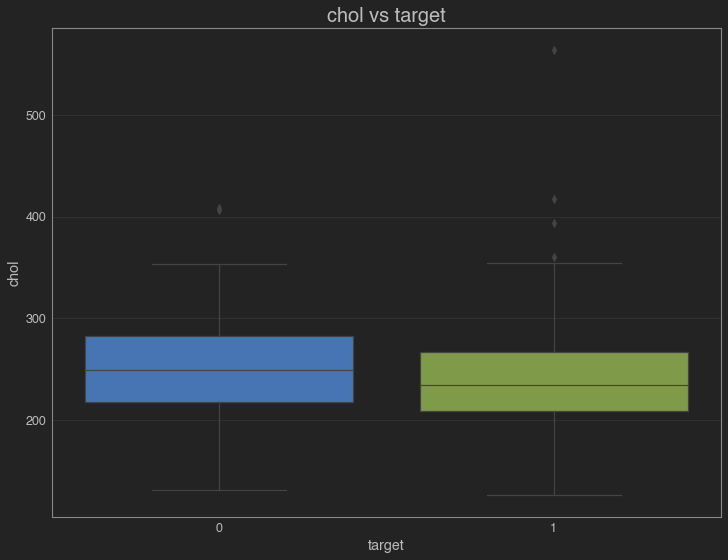

In [84]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(heart['target'], heart['chol'])
plt.title('chol vs target', fontsize = 20)
plt.show()

In [182]:
chol= heart.groupby(['sex','chol'])['target'].count().reset_index().sort_values(by='target',ascending=False)
chol.head(10).T

,115,109,48,150,172,135,134,127,167,144
sex,1,1,0,1,1,1,1,1,1,1
chol,212,204,269,254,282,234,233,226,274,246
target,5,4,4,4,4,4,4,3,3,3


## Berdasarkan plot di atas antara kolesterol tingkat dan target menunjukkan bahwa pasien cenderung menderita penyakit jantung jika memiliki tingkat kolesterol yang lebih tinggi dibandingkan dengan pasien dengan tidak menderita.Oleh karena itu, kita dapat menyimpulkan dari plot di atas bahwa tingkat kolesterol memainkan peran penting dalam menentukan penyakit jantung. Kita semua harus menjaga tingkat kolesterol kita dalam kontrol mungkin. Secara general dapat dilihat bahwa pria memiliki angka kolesterol lebih tinggi daripada wanita

EXANG

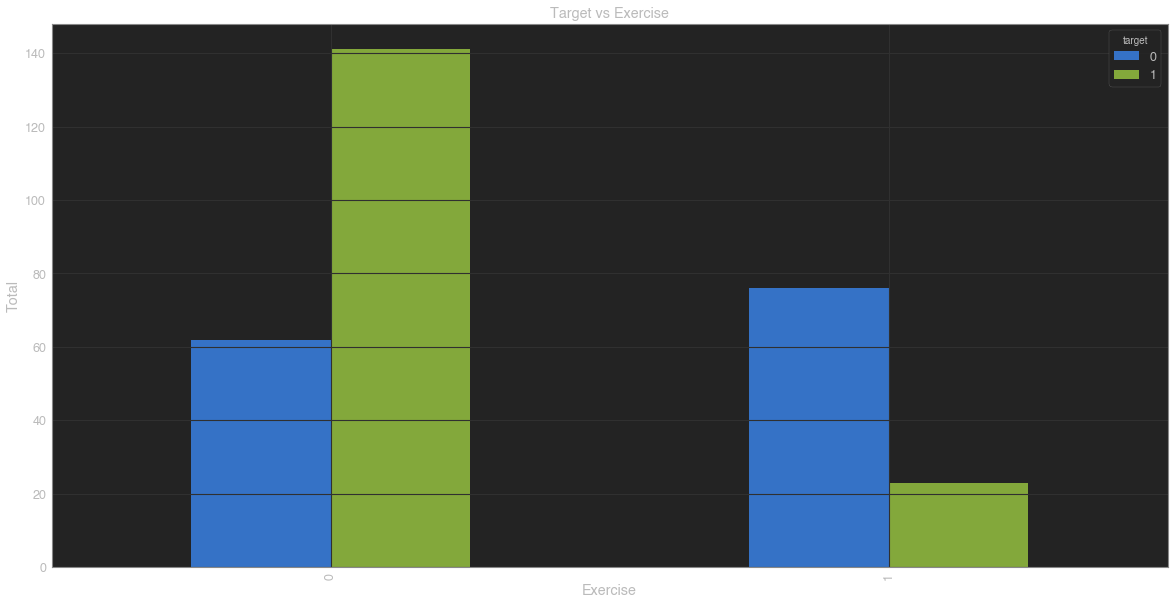

In [188]:
pd.crosstab(heart.exang,heart.target).plot(kind="bar",figsize=(20,10))
plt.title('Target vs Exercise')
plt.xlabel('Exercise')
plt.ylabel('Total')
plt.savefig('heartvsexercise.png')
plt.show()

In [186]:
exang= heart.groupby(['sex','exang'])['target'].count().reset_index().sort_values(by='target',ascending=False)
exang.head(10).T

,2,3,0,1
sex,1,1,0,0
exang,0,1,0,1
target,129,77,74,22


## plot di atas menunjukkan bahwa semakin kurang exercise maka semakin berpotensi untuk menderita serangan jantung. Terutama untuk pria

OLDPEAK

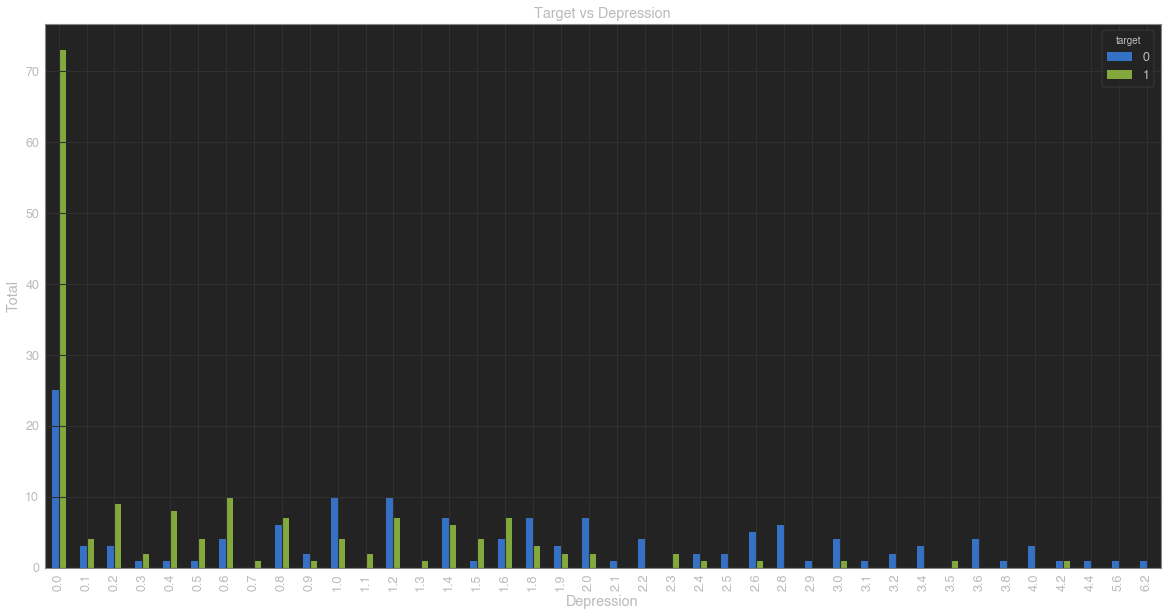

In [191]:
pd.crosstab(heart.oldpeak,heart.target).plot(kind="bar",figsize=(20,10))
plt.title('Target vs Depression')
plt.xlabel('Depression')
plt.ylabel('Total')
plt.savefig('heartvsdepression.png')
plt.show()

In [190]:
oldpeak= heart.groupby(['sex','oldpeak'])['target'].count().reset_index().sort_values(by='target',ascending=False)
oldpeak.head(10).T

,27,0,37,34,36,41,38,33,43,40
sex,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
oldpeak,0.0,0.0,1.2,0.8,1.0,1.8,1.4,0.6,2.0,1.6
target,63.0,35.0,13.0,10.0,9.0,8.0,8.0,8.0,7.0,7.0


SLOPE

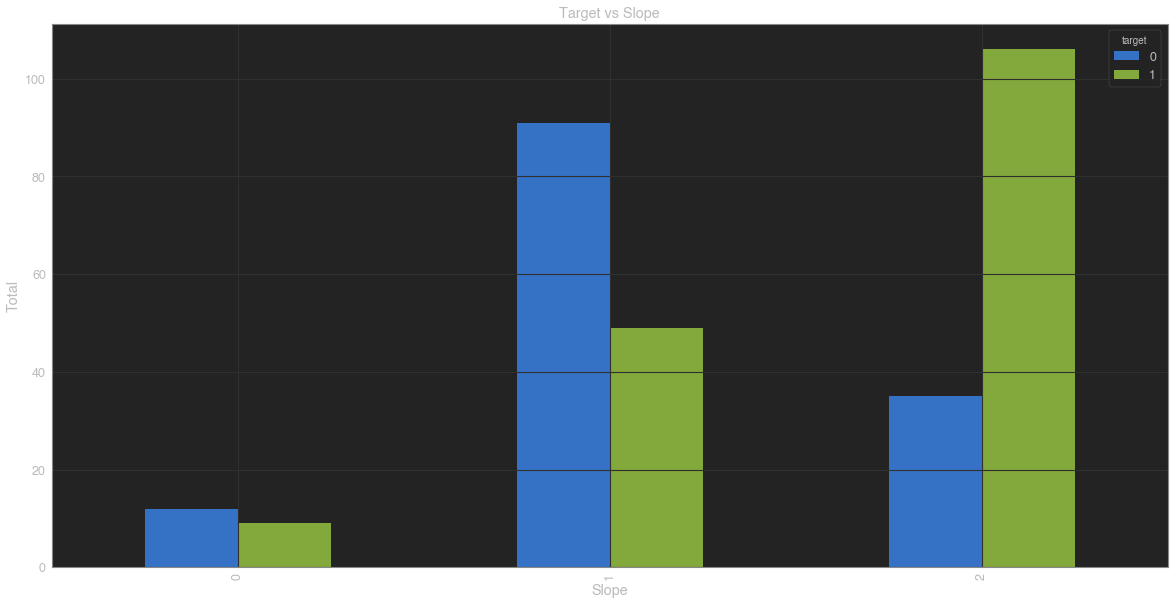

In [192]:
pd.crosstab(heart.slope,heart.target).plot(kind="bar",figsize=(20,10))
plt.title('Target vs Slope')
plt.xlabel('Slope')
plt.ylabel('Total')
plt.savefig('heartvsslope.png')
plt.show()

In [195]:
slope= heart.groupby(['sex','slope'])['target'].count().reset_index().sort_values(by='target',ascending=False)
slope.head(10).T

,4,5,2,1,3,0
sex,1,1,0,0,1,0
slope,1,2,2,1,0,0
target,95,95,46,45,16,5


## Berdasarkan data diatas, pengaruhnya terlihat paling tinggi pada slope dengan tinggi 1 dan 2 sehingga kesimpulannya semakin tinggi slope maka semakin besar pula kesempatan untuk terkena serangan jantung

FBS

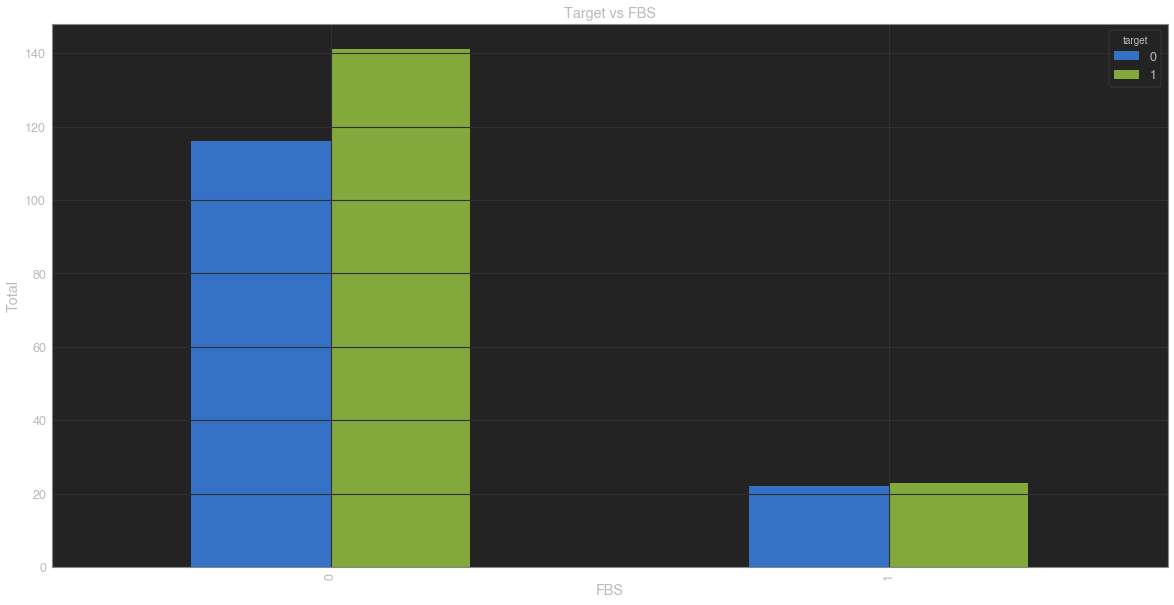

In [311]:
pd.crosstab(heart.fbs,heart.target).plot(kind="bar",figsize=(20,10))
plt.title('Target vs FBS')
plt.xlabel('FBS')
plt.ylabel('Total')
plt.savefig('heartvsfbs.png')
plt.show()

In [310]:
fbs= heart.groupby(['sex','fbs'])['target'].count().reset_index().sort_values(by='target',ascending=False)
fbs.head(10).T

,2,0,3,1
sex,1,0,1,0
fbs,0,0,1,1
target,173,84,33,12


# Berdasarkan data diatas, dapat dilihat bahwa gula darah yang rendah ternyata berpotensi untuk serangan jantung. Untuk segi gender sendiri pria yang paling terdampak disini

CA

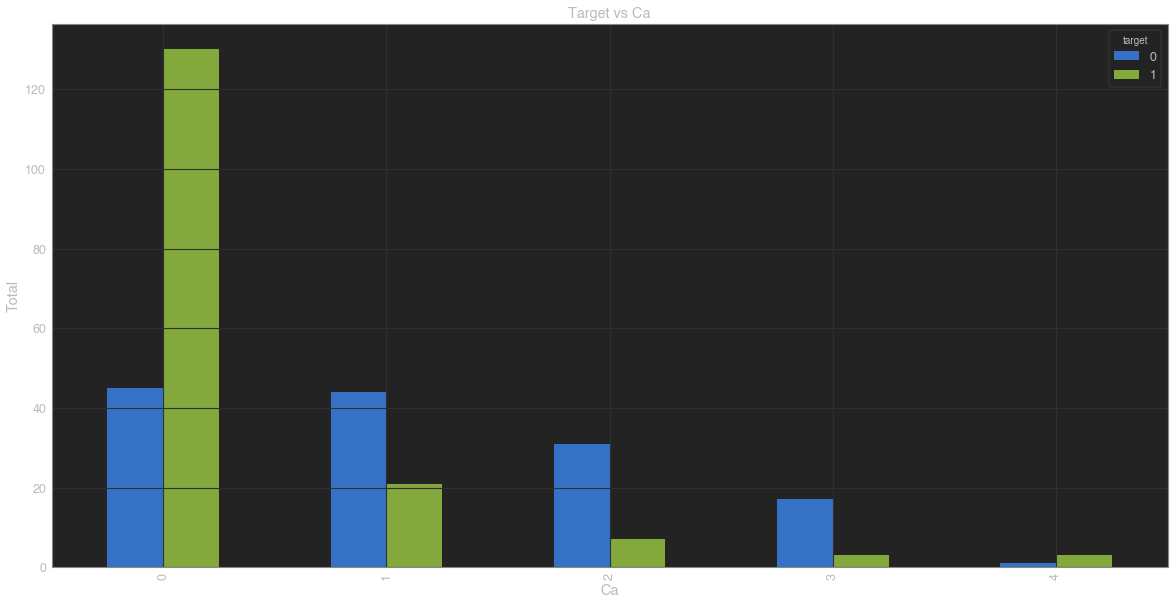

In [312]:
pd.crosstab(heart.ca,heart.target).plot(kind="bar",figsize=(20,10))
plt.title('Target vs Ca')
plt.xlabel('Ca')
plt.ylabel('Total')
plt.savefig('heartvsca.png')
plt.show()

In [313]:
ca= heart.groupby(['sex','ca'])['target'].count().reset_index().sort_values(by='target',ascending=False)
ca.head(10).T

,4,0,5,6,7,1,2,3,8
sex,1,0,1,1,1,0,0,0,1
ca,0,0,1,2,3,1,2,3,4
target,111,64,50,25,16,15,13,4,4


# dapat disimpulkan bahwa tipe 0 pada number of vesel sangat berpengaruh terhadap penyakit jantung, hal ini berlaku untuk laki-laki dan perempuan

# Data Preprocessing (Lakukan Proprocessing Data sesuai kebutuhan) (10 point) 
- https://towardsdatascience.com/data-preprocessing-concepts-fa946d11c825



## Fixing Type of the Columns

In [94]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 45.4 KB


In [106]:
heart['sex'] = heart['sex'].astype('object')
heart['cp'] = heart['cp'].astype('object')
heart['fbs'] = heart['fbs'].astype('object')
heart['restecg'] = heart['restecg'].astype('object')
heart['exang'] = heart['exang'].astype('object')
heart['slope'] = heart['slope'].astype('object')
heart['thal'] = heart['thal'].astype('object')

# Feature Engineering & Feature Selection (10 point)

NORMALIZATION

In [119]:
y = heart.target.values
x= heart.drop(['target'], axis = 1)

In [121]:
x = (x - np.min(x)) / (np.max(x) - np.min(x)).values

SPLITTING

In [124]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

SCALLING

In [198]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Lakukan Training Model Machine Learning Minimal 3 Algoritma yang berbeda (5 point)

LOGISTIC REGRESSIOn

In [199]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [200]:
print(model.coef_)
# nilai intercept
print(model.intercept_)

[[ 0.00695707 -0.79682823  0.67670023 -0.45363074 -0.2015395   0.16362527
   0.27077403  0.51917179 -0.49263612 -0.51065389  0.48968628 -0.79894986
  -0.62877776]]
[0.1665015]


In [201]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1])

In [202]:
y_pred_proba = model.predict_proba(x_test)
y_pred_proba[0]

array([0.9488139, 0.0511861])

In [203]:
confusion_matrix(y_test, y_pred)

array([[24,  5],
       [ 3, 29]])

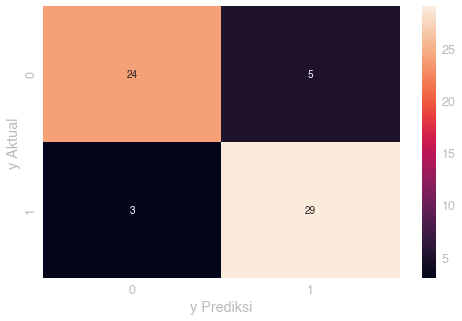

In [204]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax = ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

In [205]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [206]:
pd.DataFrame(data = [accuracy_score(y_test, y_pred)*100, recall_score(y_test, y_pred)*100,
                     precision_score(y_test, y_pred)*100, roc_auc_score(y_test, y_pred)*100,
                    f1_score(y_test, y_pred)*100],
             index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1 score'],
             columns = ['Score (%)']
            )

,Score (%)
accuracy,86.885246
recall,90.625000
precision,85.294118
roc_auc_score,86.691810
f1 score,87.878788


In [207]:
df1 = pd.DataFrame(y_test)
df1.head()

,0
0,0
1,0
2,1
3,0
4,1


In [208]:
df1['predict'] = y_pred
df1.head()

,0,predict
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1


DECISION TREE

In [209]:
modelDT = DecisionTreeClassifier() # menyimpan model algoritma decision tree ke dalam variabel 'modelDT'
modelDT.fit(x_train, y_train) # model belajar dari data train

DecisionTreeClassifier()

In [210]:
y_predDT = modelDT.predict(x_test)
y_predDT

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [212]:
y_predDT_proba = modelDT.predict_proba(x_test)
y_predDT_proba[0]

array([1., 0.])

In [213]:
confusion_matrix(y_test, y_predDT)

array([[25,  4],
       [ 9, 23]])

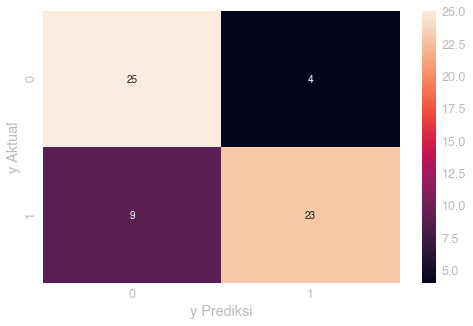

In [214]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_predDT), annot=True, fmt=".0f", ax = ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

In [215]:
print(classification_report(y_test, y_predDT))

              precision    recall  f1-score   support

           0       0.74      0.86      0.79        29
           1       0.85      0.72      0.78        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



In [216]:
pd.DataFrame(data = [accuracy_score(y_test, y_predDT)*100, recall_score(y_test, y_predDT)*100,
                     precision_score(y_test, y_predDT)*100, roc_auc_score(y_test, y_predDT)*100,
                    f1_score(y_test, y_predDT)*100],
             index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1 score'],
             columns = ['Score (%)']
            )

,Score (%)
accuracy,78.688525
recall,71.875000
precision,85.185185
roc_auc_score,79.040948
f1 score,77.966102


In [217]:
df1['predictDT'] = y_predDT
df1.head()

,0,predict,predictDT
0,0,0,0
1,0,0,1
2,1,1,1
3,0,0,1
4,1,1,1


Random Forest Classifier

In [218]:
modelRF = RandomForestClassifier() # menyimpan model algoritma decision tree ke dalam variabel 'modelRF'
modelRF.fit(x_train, y_train) # model belajar dari data train

RandomForestClassifier()

In [219]:
y_predRF = modelRF.predict(x_test)

In [220]:
# jika ingin tahu probability dalam membuat tebakan
y_pred_proba = modelRF.predict_proba(x_test)
y_pred_proba

array([[0.94, 0.06],
       [0.75, 0.25],
       [0.48, 0.52],
       [0.59, 0.41],
       [0.14, 0.86],
       [0.06, 0.94],
       [0.3 , 0.7 ],
       [0.85, 0.15],
       [0.95, 0.05],
       [0.51, 0.49],
       [0.24, 0.76],
       [0.83, 0.17],
       [0.18, 0.82],
       [0.84, 0.16],
       [0.03, 0.97],
       [0.03, 0.97],
       [0.01, 0.99],
       [0.99, 0.01],
       [0.94, 0.06],
       [0.93, 0.07],
       [0.41, 0.59],
       [0.89, 0.11],
       [0.41, 0.59],
       [0.22, 0.78],
       [0.28, 0.72],
       [0.32, 0.68],
       [0.9 , 0.1 ],
       [0.18, 0.82],
       [0.92, 0.08],
       [0.18, 0.82],
       [0.89, 0.11],
       [0.94, 0.06],
       [0.66, 0.34],
       [0.6 , 0.4 ],
       [0.33, 0.67],
       [0.81, 0.19],
       [0.23, 0.77],
       [0.24, 0.76],
       [0.31, 0.69],
       [0.17, 0.83],
       [0.26, 0.74],
       [0.12, 0.88],
       [0.21, 0.79],
       [0.09, 0.91],
       [0.21, 0.79],
       [0.55, 0.45],
       [0.43, 0.57],
       [0.01,

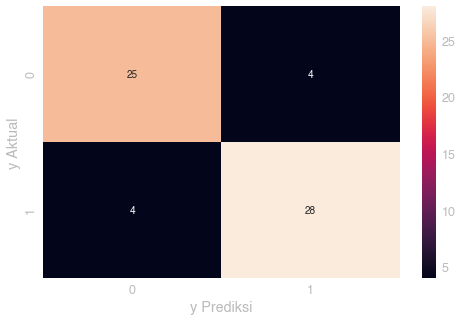

In [221]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_predRF), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

In [222]:
# confusion matrix report
print(classification_report(y_test, y_predRF))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [223]:
pd.DataFrame(data = [accuracy_score(y_test, y_predRF)*100, recall_score(y_test, y_predRF)*100,
                     precision_score(y_test, y_predRF)*100, roc_auc_score(y_test, y_predRF)*100,
                    f1_score(y_test, y_predRF)*100],
             index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1 score'],
             columns = ['Score (%)']
            )

,Score (%)
accuracy,86.885246
recall,87.500000
precision,87.500000
roc_auc_score,86.853448
f1 score,87.500000


In [224]:
df1['predictRF'] = y_predRF
df1.head()

,0,predict,predictDT,predictRF
0,0,0,0,0
1,0,0,1,0
2,1,1,1,1
3,0,0,1,0
4,1,1,1,1


# Lakukan Hyper Parameter Tuning untuk ketiga algoritma yang anda pilih (5 point)

LOGISTIC REGRESSION

In [225]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [298]:
penalty = ['l1', 'l2']
C = np.logspace(-4,4,20)

hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression()

clf = GridSearchCV(logreg, hyperparameters, cv=10)

best_model = clf.fit(x_train,y_train)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [308]:
best_model.best_estimator_

LogisticRegression(C=0.08858667904100823)

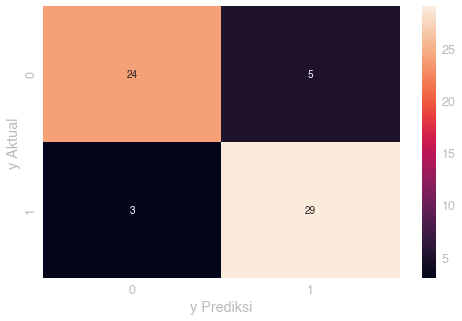

In [268]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

In [299]:
LR2 = pd.DataFrame(data = [accuracy_score(y_test, y_pred)*100, recall_score(y_test, y_pred)*100,
                     precision_score(y_test, y_pred)*100, roc_auc_score(y_test, y_pred)*100,
                    f1_score(y_test, y_pred)*100],
             index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1 score'],
             columns = ['Score (%)']
            )
LR2

,Score (%)
accuracy,86.885246
recall,90.625000
precision,85.294118
roc_auc_score,86.691810
f1 score,87.878788


DECISION TREE

In [236]:
modelDT.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [271]:
params = {"criterion":("gini", "entropy"), "splitter":("best", "random"),"max_depth":(list(range(1, 20))), "min_samples_split":[2, 3, 4], "min_samples_leaf":list(range(1, 20))}

tree = DecisionTreeClassifier(random_state=42)
dtgrid = GridSearchCV(tree, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3, iid=True)
dtgrid.fit(x_train, y_train)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 2260 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 6260 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 11860 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 12996 out of 12996 | elapsed:   46.7s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), iid=True,
             n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ('best', 'random')},
             scoring='accuracy', verbose=1)

In [272]:
dtgrid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=7,
                       random_state=42)

In [277]:
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=4,
                              min_samples_leaf=7, 
                              random_state=42)
tree.fit(x_train, y_train)
y_predDT2 = tree.predict(x_test)
y_predDT2

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [278]:
confusion_matrix(y_test, y_predDT2)

array([[27,  2],
       [ 9, 23]])

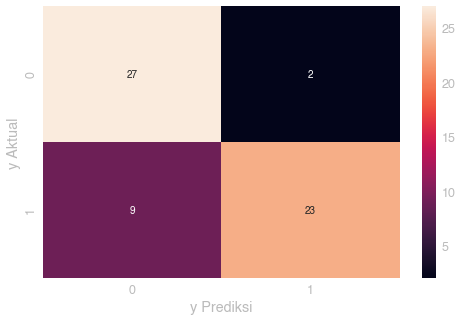

In [279]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_predDT2), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

In [297]:
DT2 =pd.DataFrame(data = [accuracy_score(y_test, y_predDT2)*100, recall_score(y_test, y_predDT2)*100,
                     precision_score(y_test, y_predDT2)*100, roc_auc_score(y_test, y_predDT2)*100,
                    f1_score(y_test, y_predDT2)*100],
             index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1 score'],
             columns = ['Score (%)']
            )
DT2

,Score (%)
accuracy,81.967213
recall,71.875000
precision,92.000000
roc_auc_score,82.489224
f1 score,80.701754


RANDOM FOREST

In [289]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_random = GridSearchCV(rand_forest, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3, iid=True)
# rf_random.fit(x_train, y_train)


In [291]:
rand_forest = RandomForestClassifier(bootstrap=True,
                                     max_depth=70, 
                                     max_features='auto', 
                                     min_samples_leaf=4, 
                                     min_samples_split=10,
                                     n_estimators=400)
rand_forest.fit(x_train, y_train)
y_predRF2 = rand_forest.predict(x_test)
y_predRF2

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1])

In [292]:
confusion_matrix(y_test, y_predRF2)

array([[24,  5],
       [ 3, 29]])

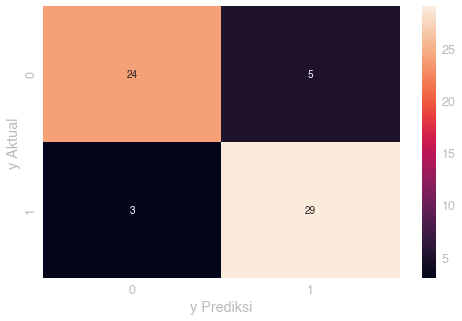

In [293]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_predRF2), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

In [296]:
RF2=pd.DataFrame(data = [accuracy_score(y_test, y_predDT2)*100, recall_score(y_test, y_predDT2)*100,
                     precision_score(y_test, y_predDT2)*100, roc_auc_score(y_test, y_predDT2)*100,
                    f1_score(y_test, y_predDT2)*100],
             index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1 score'],
             columns = ['Score (%)']
            )
RF2

,Score (%)
accuracy,81.967213
recall,71.875000
precision,92.000000
roc_auc_score,82.489224
f1 score,80.701754


# Untuk Classification case :

# Gunakan Confusion Metrics atau Classification Report

# Jelaskan Maksud dari hasil evaluation metrics (Confusion Matrix & Classification Report )tersebut

# Tentukan jenis evaluation metrics yang akan anda fokuskan dan jelaskan alasannya

confusion matrix adalah Salah satu teknik yang dapat digunakan untuk mengukur kinerja suatu model khusunya kasus klasifikasi (supervised learning). memberi informasi tentang kesalahan yang dibuat oleh model tetapi juga jenis kesalahan yang dibuat. biasanya gambaran hasilnya itu kayak tabel matrix yang terdiri dari 4 istilah True Positive (TP), True Negative (TN), False Positive (FP) dan False Negative (FN). 

TP = data positif yang diprediksi benar.
misalkan prediksi sakit jantung. pasien menderita jantung, nah hasil modelnya juga berkata demikian
TN = data negatif yang diprediksi benar.
misalkan pasien ga sakit jantung . nah model nya hasinya juga menyatakan demikian
FP = data negatif namun diprediksi positif. 
misalkan pasien nya ga menderita sakit jantung. tp modelnya prediksi orangnya sakit jantung
FN = data positif namun diprediksi negatif. 
misalkan pasien menderita sakit jantung tp diprediksi ga sakit jantung

mengukur performa metrix dari confusion matrix itu ada accuracy, precision dan recall

akurasi : gambarin seberapa akuratnnya model dapat mengklaisifikasikan dengan benar. ratio prediksi benar(positif dan negatif) dengan keseluruhan data.  

Precision : gambarin tingkat keakuratan antara data yang diminta dengan hasil prediksi yang diberikan oleh model. Maka, precision merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positf. 

Recall : gambarin keberhasilan model dalam menemukan kembali sebuah informasi. Maka, recall merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif

f1 score: rata2 harmonik dari precision dan recall

evaluation matrix yang saya fokuskan disini adalah precision dan recall karena nilai precision dapat menjawab pertanyaan “Berapa persen pasien yang benar menderita sakit jantung dari keseluruhan pasien yang diprediksi menderita jantung?” dan nilai recall dapat menjawab pertanyaan “Berapa persen pasien yang diprediksi sakit jantung dibandingkan keseluruhan pasien yang sebenarnya menderita sakit jantung”.

# Lakukan Perbandingan seluruh model yg digunakan, dan pilih yg terbaik, Kemudian Export Model (5 point)

In [302]:
print("RF\n")
print(RF2)
print("DT\n")
print(DT2)
print("LR\n")
print(LR2)

RF

               Score (%)
accuracy       81.967213
recall         71.875000
precision      92.000000
roc_auc_score  82.489224
f1 score       80.701754
DT

               Score (%)
accuracy       81.967213
recall         71.875000
precision      92.000000
roc_auc_score  82.489224
f1 score       80.701754
LR

               Score (%)
accuracy       86.885246
recall         90.625000
precision      85.294118
roc_auc_score  86.691810
f1 score       87.878788


In [305]:
with open('modelDT','wb') as f:
    pickle.dump(DT2,f)

In [306]:
with open('modelRF','wb') as f:
    pickle.dump(RF2,f)

In [307]:
with open('modelLR','wb') as f:
    pickle.dump(LR2,f)


# Buat Kesimpulan dan Saran untuk Perusahaan sesuai dengan Problem, Goals, EDA dan Model yang telah anda buat (10 point)

- mendapatkan usia dan gender yang paling berpotensi terdampak penyakit jantung
- mendapatkan faktor-faktor lain yang mempengaruhi penyakit jantung
- mendapatkan model untuk mengklasifikasikan pasien yang mengidap penyakit jantung dan tidak

## Berdasarkan data diatas ditemukan bahwa, umur pasien yang paling banyak berpotensi terkena penyakit jantung adalah 51, 54,41, dan 44. Sedangkan untuk yang paling teridentifikasi tidak berpotensi adalah di umur 58,57,60, dan 59. Angka target tersebut mulai tidak stagnan setelah menginjak umur 40 tahun hingga 67. Berdasarkan urutan 10 serangan jantung, pria ebih banyak mengidap serangan jantung. Dapat kita simpulkan bahwa laki-laki memiliki kecenderungan untuk mengidap jantung lebih besar dibandingkan wanita dengan total 206 jiwa sedangkan wanita 96 jiwa. Lalu Type Chest Pain 2 atau nonanginal memiliki kecenderungan untuk mengidap jantung. Nyeri dada sangat mungkin nonanginal jika durasinya lebih dari 30 menit atau kurang dari 5 detik, meningkat dengan inspirasi, dapat dibawa dengan satu gerakan batang atau lengan, dapat dibawa oleh tekanan jari lokal, atau membungkuk ke depan, atau dapat lega segera berbaring. Lalu untuk tipe 0 atau typical memiliki angka tidak terdeteksi jantung yang tinggi. Pria yang memiliki nyeri dada tipe 0 menderita serangan jantung paling tinggi dan tipe 2 tertinggi kedua. Kecenderungan ini sama untuk wanita. Plot diatas menunjukkan bahwa perempuan memiliki tresbps lebih tinggi daripada pria dalam kasus tidak menderita penyakit jantung, sedangkan pria dan wanita memiliki hampir sama tresbps dalam kasus menderita penyakit jantung. Juga, dalam kasus menderita penyakit jantung, pasien memiliki tresbps sedikit lebih rendah dibandingkan dengan pasien yang tidak menderita penyakit jantung. Berdasarkan plot di atas antara kolesterol tingkat dan target menunjukkan bahwa pasien cenderung menderita penyakit jantung jika memiliki tingkat kolesterol yang lebih tinggi dibandingkan dengan pasien dengan tidak menderita.Oleh karena itu, kita dapat menyimpulkan dari plot di atas bahwa tingkat kolesterol memainkan peran penting dalam menentukan penyakit jantung. Kita semua harus menjaga tingkat kolesterol kita dalam kontrol mungkin. Secara general dapat dilihat bahwa pria memiliki angka kolesterol lebih tinggi daripada wanita. plot di atas menunjukkan bahwa semakin kurang exercise maka semakin berpotensi untuk menderita serangan jantung. Terutama untuk pria. ## Berdasarkan data diatas, pengaruhnya terlihat paling tinggi pada slope dengan tinggi 1 dan 2 sehingga maka semakin tinggi slope maka semakin besar pula kesempatan untuk terkena serangan jantung.

Saran 

# Berdasarkan data diatas serta penelusuran lebih lanjut dengan referensi lain. DItemukan da berbagai cara untuk pencegahan penyakit jantung yang dapat dilakukan, di antaranya:

# Menerapkan pola hidup sehat dan exercise dengan mengurangi makanan berkolesterol tinggi serta melakukan olahraga secara rutin.Berhenti merokok karena menyebabkan mudahnya nonanginal.Lalu diharuskan juga mengurangi konsumsi minuman keras. Khusus untuk yang telah menderita, pengidap angina dianjurkan untuk meminum obat-obatan yang diberikan oleh dokter dan sesuai dengan dosis. Asupan makanan juga berpotensi untuk meningkatkan kadar kolesterol, tkanan darah, dan peradangan. Maka dari itu diharuskan perbanyak makanan sehat setiap harinya seperti dilansir Healthline, sayuran berdaun hijau seperti bayam, kale, sawi terbukti dapat menurunkan risiko penyakit jantung. Sayuran ini merupakan sumber vitamin K, mineral, dan antioksidan yang bisa melindungi pembuluh darah arteri dan membantu proses pembekuan darah. Kandungan nitrat dalam sayuran berdaun hijau juga terbukti bisa membantu menurunkan tekanan darah, mengurangi kekakuan arteri, dan meningkatkan fungsi sel pelapis pembuluh darah. Memakan lebih banyak biji-bijian seperti beras merah, gandum utuh, sampai quinoa lebih kaya serat dibandingkan biji-bijian olahan. Makanan ini dapat menurunkan kolesterol jahat (LDL), sehingga bisa menurunkan risiko penyakit jantung. Saat memilih biji-bijian, pastikan Anda cermat. Pilih yang mengandung gandum utuh (whole grain), bukan produk gandum seperti terigu.